In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


In [34]:
def remove_outliers(df, variable, threshold=1.5):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1

    outliers = (df[variable] < q1 - threshold * iqr) | (df[variable] > q3 + threshold * iqr)

    df_cleaned = df[~outliers]

    return df_cleaned

In [35]:
df = pd.read_excel('scraped_products.xlsx')
df = df.drop('series', axis=1) # usuwanie serii zestawow z danych
df = df.drop('id', axis=1) # usuwanie id zestawow z danych
df['price'] = df['price'].str.replace(' zł', '').str.replace(' ', '').str.replace(',', '.').astype(float) #konwersja cen na odpowiedni format
df = df.fillna(0) # zapelnianie brakujacych informacji 0

df = remove_outliers(df, 'price', 1.5)
df = remove_outliers(df, 'year', 1)
df = remove_outliers(df, 'element', 2)
df = remove_outliers(df, 'figures', 2)

print(len(df))
df

378


,price,year,element,figures,manual,box
0,79.99,1991.0,35.0,1.0,1.0,0.0
1,109.99,1994.0,51.0,2.0,1.0,0.0
2,169.99,1992.0,22.0,3.0,1.0,0.0
4,159.99,1995.0,64.0,2.0,1.0,0.0
7,269.99,1997.0,14.0,3.0,0.0,0.0
...,...,...,...,...,...,...
495,69.99,1994.0,62.0,3.0,1.0,0.0
497,49.99,1994.0,44.0,1.0,1.0,0.0
498,49.99,1992.0,33.0,1.0,1.0,0.0
501,119.99,1987.0,36.0,2.0,1.0,0.0


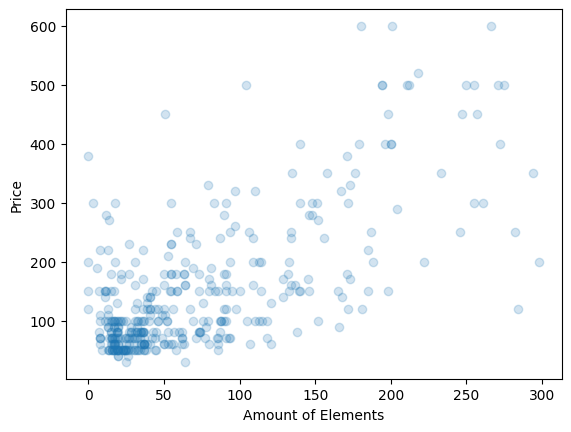

In [36]:
plt.scatter(df['element'], df['price'], alpha=0.2)
plt.xlabel('Amount of Elements')
plt.ylabel('Price')
plt.show()

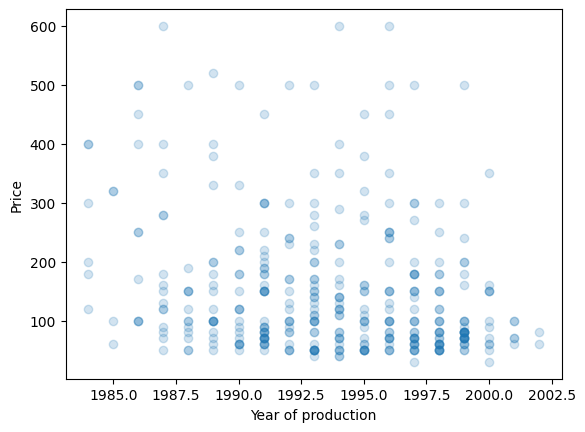

In [37]:
plt.scatter(df['year'], df['price'], alpha=0.2)
plt.xlabel('Year of production')
plt.ylabel('Price')
plt.show()

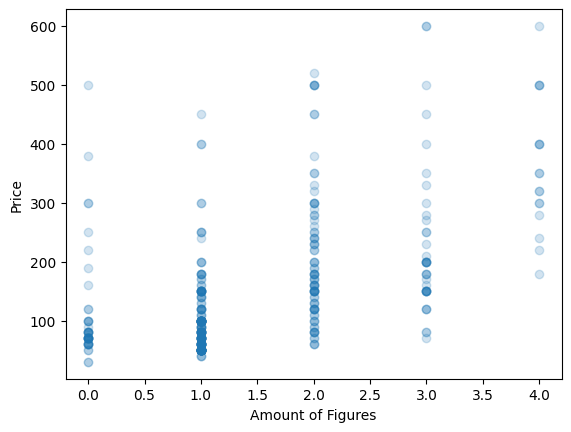

In [38]:
plt.scatter(df['figures'], df['price'], alpha=0.2)
plt.xlabel('Amount of Figures')
plt.ylabel('Price')
plt.show()

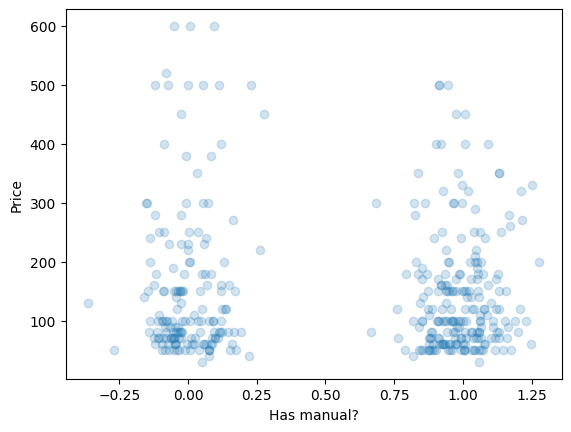

In [39]:
plt.scatter(df['manual']+np.random.normal(0, 0.1, size=len(df['manual'])), df['price'], alpha=0.2)
plt.xlabel('Has manual?')
plt.ylabel('Price')
plt.show()

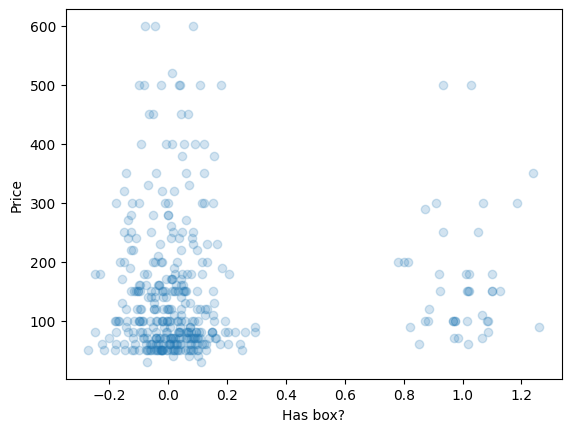

In [40]:
plt.scatter(df['box']+np.random.normal(0, 0.1, size=len(df['box'])), df['price'], alpha=0.2)
plt.xlabel('Has box?')
plt.ylabel('Price')
plt.show()

In [41]:
#macierz korelacji
correlation_matrix = df[['price', 'element', 'year', 'figures', 'box', 'manual']].corr()
print(correlation_matrix)

            price   element      year   figures       box    manual
price    1.000000  0.685460 -0.247489  0.553222  0.064411 -0.056076
element  0.685460  1.000000 -0.168855  0.387963  0.045814  0.069553
year    -0.247489 -0.168855  1.000000 -0.139783  0.050386 -0.052545
figures  0.553222  0.387963 -0.139783  1.000000 -0.073674  0.027395
box      0.064411  0.045814  0.050386 -0.073674  1.000000  0.205858
manual  -0.056076  0.069553 -0.052545  0.027395  0.205858  1.000000


In [46]:
X = df[['year', 'element', 'figures', 'manual', 'box']]
y = df['price']

#podzial na dane uczace i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2137)

#standaryzacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#tworzenie modelu
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train_scaled, y_train)

#testowanie modelu
y_pred = model.predict(X_test_scaled)

#sprawdzanie skutecznosci modelu
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Squared Error: 4566.56948962509
Mean Absolute Error (MAE): 50.69016953891651
R-squared: 0.7608059190506916


In [47]:
#predykacja z uzyciem modelu
new_data = {'year': [1990], 'element': [100], 'figures': [5], 'manual': [1], 'box': [0]}
new_df = pd.DataFrame(new_data)
new_prediction = model.predict(scaler.transform(new_df))
print(f'Predicted Price for New Data: {new_prediction[0]}')

Predicted Price for New Data: 358.6501192424482


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2137)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000, random_state=2137)
model.fit(X_train_scaled, y_train)

new_data = pd.DataFrame({'year': [1990], 'element': [100], 'figures': [5], 'manual': [1], 'box': [0]})
new_data_scaled = scaler.transform(new_data)

predictions = model.predict(new_data_scaled)

print("Predictions:", predictions)

Predictions: [378.99365299]
